In [1]:
import re
import math
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score , recall_score , confusion_matrix , f1_score
from sklearn.model_selection import GridSearchCV
from ast import literal_eval
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
from sklearn import datasets, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
#pip install scikit-learn
#data_train

In [3]:
#data_train = pd.read_csv('./data/twitter_data_before_analysis.csv', error_bad_lines=False)
data_train = pd.read_csv('./data/twitter_data_before_analysis1.csv', error_bad_lines=False)
data_train = data_train.append(pd.read_csv('./data/ko_news_data_before_analysis.csv', error_bad_lines=False))
data_train = data_train.append(pd.read_csv('./data/en_news_data_before_analysis.csv', error_bad_lines=False))

In [4]:
data_train

,Unnamed: 0,period,closer#,category,label,Silhouette,C1,C2,C3,C4,...,C92,C93,C94,C95,C96,C97,C98,C99,C100,result
0,0,202011,2,3.0,1.0,0.126229,-0.001495,0.003309,0.006705,0.003787,...,-0.003025,0.002794,-0.000103,-0.001215,-0.005617,-0.000767,0.003659,-0.001297,-0.003641,1
1,1,202011,2,3.0,12.0,0.126229,-0.021860,-0.026092,0.073803,-0.043048,...,-0.018356,0.030260,-0.009593,-0.085919,-0.086635,-0.032728,0.003305,0.029844,-0.030539,1
2,2,202011,2,3.0,13.0,0.126229,-0.006153,-0.002951,0.007688,-0.006929,...,-0.002736,0.001071,-0.000826,-0.002505,-0.002000,-0.006141,-0.000919,0.005992,-0.000431,1
3,3,202011,2,3.0,12.0,0.126229,-0.011715,-0.012549,0.026318,-0.014970,...,-0.010255,0.013182,-0.005682,-0.035902,-0.030800,-0.010657,0.002631,0.007532,-0.014666,1
4,4,202011,2,3.0,12.0,0.126229,-0.004312,-0.008192,0.024495,-0.017751,...,-0.000795,0.011308,-0.005071,-0.027211,-0.024827,-0.013575,-0.000735,0.013313,-0.009291,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112261,112261,201924,2,1.0,5.0,0.746625,0.002639,-0.017651,0.005692,0.013071,...,-0.018755,-0.004214,-0.011068,0.005706,0.015451,0.006023,0.001769,0.004318,0.015926,2
112262,112262,201924,2,1.0,5.0,0.746625,-0.000535,-0.016673,0.003547,0.007739,...,-0.030073,0.001249,-0.008988,0.004042,0.014530,-0.000182,0.002224,-0.003322,0.016009,2
112263,112263,201924,2,1.0,5.0,0.746625,0.004187,-0.007702,-0.000028,0.002341,...,-0.001273,0.000613,-0.004343,-0.003402,0.004426,-0.001443,0.001934,-0.000474,0.007715,2
112264,112264,201924,2,1.0,5.0,0.746625,-0.002951,-0.012826,-0.000484,0.004241,...,-0.015236,0.000469,-0.011737,0.003951,0.013484,0.002950,0.001749,0.001292,0.012489,2


In [5]:
data_train['period'] = pd.to_numeric(data_train['period'], errors='coerce')
data_train['category'] = pd.to_numeric(data_train['category'], errors='coerce')
data_train['label'] = pd.to_numeric(data_train['label'], errors='coerce')
data_train['Silhouette'] = pd.to_numeric(data_train['Silhouette'], errors='coerce')

In [6]:
x_data_df = data_train[data_train.columns.difference(['result'])]

In [7]:
#x_data_df = data_train[['period','raw_data','closer#','category','label','Silhouette']]
y_data_df = data_train['result']

In [8]:
x_data_df = x_data_df.drop('Unnamed: 0', axis=1)

In [9]:
#x_data_df['raw_data'] = x_data_df['raw_data'].apply(lambda x: x[1:len(x)-1].split(','))
print(len(x_data_df)) 

187533


In [10]:
X_train,X_test, y_train, y_test = train_test_split(x_data_df,y_data_df,test_size=0.2,random_state=11)

In [11]:
rf_clf = RandomForestClassifier(random_state = 11 ,n_jobs=-1) # random forest

In [12]:
X_train.isnull().sum()

C1            0
C10           0
C100          0
C11           0
C12           0
             ..
Silhouette    0
category      0
closer#       0
label         0
period        0
Length: 105, dtype: int64

In [13]:
rf_clf.fit(X_train, y_train)

y_score = rf_clf.predict_proba(X_test)



In [14]:
rf_pred = rf_clf.predict(X_test)  # random forest predict

In [15]:
print('Random Forest Accuracy :  ',accuracy_score(y_test,rf_pred))
print('Random Forest Precision :  ',precision_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest Recall :  ',recall_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest f1 :  ',f1_score(y_test,rf_pred,pos_label='positive',average='weighted'))

Random Forest Accuracy :   0.9999733383101821
Random Forest Precision :   0.9999733436996484
Random Forest Recall :   0.9999733383101821
Random Forest f1 :   0.9999733392647576


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [16]:
y_score

array([[0.98, 0.02, 0.  ],
       [0.01, 0.99, 0.  ],
       [1.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  ],
       [0.01, 0.99, 0.  ],
       [0.  , 1.  , 0.  ]])

In [17]:
#conda update sklearn

In [18]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[1, 2, 3])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])



251       1
21274     2
2408      1
42364     2
10786     2
         ..
62404     2
94958     2
101547    2
64945     2
16938     2
Name: result, Length: 37507, dtype: int64
[[1 0 0]
 [0 1 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]
class :  0 == 1.0
class :  1 == 1.0
class :  2 == 1.0


In [19]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

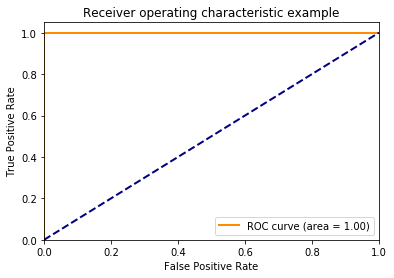

In [20]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

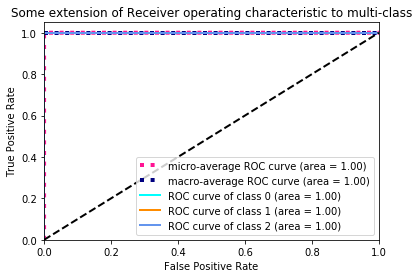

In [21]:
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [22]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

In [23]:
print('Decision Tree Accuracy :  ',accuracy_score(y_test,dt_pred))
print('Decision Tree Precision :  ',precision_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree Recall :  ',recall_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree f1 :  ',f1_score(y_test,dt_pred,pos_label='positive',average='weighted'))

Decision Tree Accuracy :   1.0
Decision Tree Precision :   1.0
Decision Tree Recall :   1.0
Decision Tree f1 :   1.0


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [24]:
#gb_clf = GradientBoostingClassifier(random_state = 11) # random forest
lgbm_clf =  LGBMClassifier(n_estimators=400,random_state = 11)

In [25]:
#gb_clf.fit(X_train,y_train)
#gb_pred = gb_clf.predict(X_test)

lgbm_clf.fit(X_train,y_train)
lgbm_pred = dt_clf.predict(X_test)

In [26]:
#print('Gredient Boosting Accuracy :  ',accuracy_score(y_test,gb_pred))
#print('Gredient Boosting Precision :  ',precision_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting Recall :  ',recall_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting f1 :  ',f1_score(y_test,gb_pred,pos_label='positive',average='weighted'))
print('Light GBM Accuracy :  ',accuracy_score(y_test,lgbm_pred))
print('Light GBM Precision :  ',precision_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM Recall :  ',recall_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM f1 :  ',f1_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))

Light GBM Accuracy :   1.0
Light GBM Precision :   1.0
Light GBM Recall :   1.0
Light GBM f1 :   1.0


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [27]:
lr_clf = LogisticRegression(random_state = 11)

In [28]:
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

In [29]:
print('Logistic Regression Accuracy :  ',accuracy_score(y_test,lr_pred))
print('Logistic Regression  Precision :  ',precision_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  Recall :  ',recall_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  f1 :  ',f1_score(y_test,lr_pred,pos_label='positive',average='weighted'))

Logistic Regression Accuracy :   0.45228890607086675
Logistic Regression  Precision :   0.20456525455478133
Logistic Regression  Recall :   0.45228890607086675
Logistic Regression  f1 :   0.281714270073477


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
y_score = lr_clf.predict_proba(X_test)

In [31]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[1, 2, 3])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

251       1
21274     2
2408      1
42364     2
10786     2
         ..
62404     2
94958     2
101547    2
64945     2
16938     2
Name: result, Length: 37507, dtype: int64
[[1 0 0]
 [0 1 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]
class :  0 == 0.47776487578931776
class :  1 == 0.6182921295871555
class :  2 == 0.7087927274960844


In [32]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

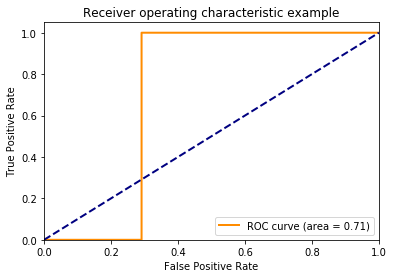

In [33]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

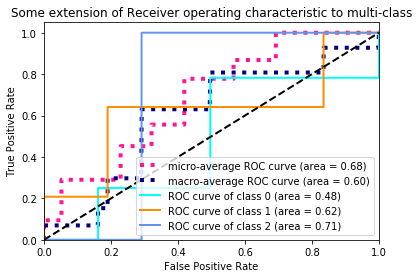

In [34]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [35]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [36]:
X_train

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
3819,-0.001065,-0.001344,0.001918,0.000592,-0.004610,-0.002905,-0.000087,-0.003956,-0.003297,-0.005316,...,0.004083,0.001433,-0.000216,0.001440,-0.003674,0.696935,2.0,2,6.0,202011
40667,0.004591,0.000229,-0.002036,-0.002419,0.001004,0.003154,0.001899,-0.003817,0.000912,-0.000545,...,0.000687,0.000774,0.004442,-0.000648,-0.002980,0.009741,2.0,2,12.0,201923
994,-0.003196,0.004062,-0.002566,-0.004181,0.002056,-0.002748,0.003787,0.002265,-0.002280,0.001659,...,0.000141,0.000338,-0.002144,0.001788,-0.000269,0.126229,3.0,2,13.0,202011
81522,-0.007798,-0.029958,-0.003762,0.019341,-0.009424,-0.000633,0.020104,0.008388,-0.013617,-0.020365,...,-0.004999,-0.011506,0.024091,-0.015833,0.001982,0.737198,1.0,2,7.0,201912
80624,-0.085756,-0.228203,-0.043884,0.212829,-0.071506,0.035740,0.193018,0.062508,-0.138530,-0.174180,...,-0.026984,-0.101138,0.222024,-0.117305,0.040608,0.737198,1.0,2,8.0,201912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27060,-0.009905,-0.019656,-0.013295,0.009479,0.003376,0.013583,0.005138,-0.015896,0.001607,0.005390,...,-0.010030,-0.013547,-0.006398,-0.007302,0.007872,0.738239,1.0,2,6.0,201711
22350,-0.006707,-0.001204,0.004745,-0.001618,0.003204,0.002872,-0.007491,-0.003652,-0.009565,-0.002143,...,0.002199,-0.000288,0.003603,0.003144,-0.005077,0.711584,1.0,2,5.0,202021
21584,-0.011310,-0.006785,-0.003580,0.005423,-0.005037,-0.003407,-0.001252,0.011018,-0.002606,-0.013081,...,0.002442,0.002440,-0.004818,0.003340,-0.004840,0.726900,3.0,2,6.0,201911
6687,-0.002570,0.000177,0.004565,-0.000599,-0.005442,-0.001149,0.009258,-0.001158,-0.009031,-0.004377,...,-0.003596,-0.002028,0.000881,-0.004645,-0.008040,0.369699,2.0,2,13.0,202021


In [37]:
model = Sequential()
model.add(Dense(120, input_dim=105, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [38]:
# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
from keras.utils import to_categorical

y_train = y_train.apply(lambda x : x-1)

In [40]:
y_cate_train = to_categorical(y_train , num_classes=3)
#y_cate_train = y_train

In [41]:
#y_cate_train = list(y_train)

In [42]:
#X_train

In [43]:
model.fit(X_train,y_cate_train, epochs=30, batch_size=500)

Epoch 1/30
150026/150026 [==============================] - 1s 7us/step - loss: 305.6554 - accuracy: 0.3951
Epoch 2/30
150026/150026 [==============================] - 1s 6us/step - loss: 138.8888 - accuracy: 0.4045
Epoch 3/30
150026/150026 [==============================] - 1s 6us/step - loss: 39.8991 - accuracy: 0.4000
Epoch 4/30
150026/150026 [==============================] - 1s 6us/step - loss: 35.4580 - accuracy: 0.3921
Epoch 5/30
150026/150026 [==============================] - 1s 6us/step - loss: 16.8768 - accuracy: 0.3973
Epoch 6/30
150026/150026 [==============================] - 1s 6us/step - loss: 17.0450 - accuracy: 0.3965
Epoch 7/30
150026/150026 [==============================] - 1s 6us/step - loss: 6.7214 - accuracy: 0.4069
Epoch 8/30
150026/150026 [==============================] - 1s 6us/step - loss: 2.7273 - accuracy: 0.4242
Epoch 9/30
150026/150026 [==============================] - 1s 6us/step - loss: 1.8352 - accuracy: 0.4258
Epoch 10/30
150026/150026 [===========

In [44]:
X_test

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
251,0.003609,0.005405,-0.003673,0.002230,-0.005533,0.002248,-0.002091,0.003875,-0.003366,0.006010,...,-0.005088,0.002435,-0.001425,0.001564,0.004732,0.126229,3.0,2,1.0,202011
21274,-0.004946,0.002248,-0.001245,0.004582,-0.005341,-0.001849,-0.001053,0.001715,-0.007273,-0.005314,...,0.004164,-0.001582,-0.000197,0.007651,-0.006374,0.711584,1.0,2,5.0,202021
2408,-0.004942,-0.000757,0.004087,0.002646,-0.002901,-0.001663,0.001977,0.003490,0.003709,-0.001759,...,-0.004506,-0.003069,-0.002461,0.003005,-0.001954,0.126229,3.0,2,1.0,202011
42364,-0.114611,-0.014224,-0.048490,-0.154150,0.022153,0.013070,-0.049324,-0.069129,-0.090181,-0.037355,...,-0.058670,-0.024119,-0.034482,0.006286,-0.063955,0.743554,1.0,2,5.0,201821
10786,0.000631,0.004780,-0.004805,0.004262,0.004554,0.003390,0.001349,-0.001896,-0.002344,0.002621,...,-0.003721,0.004324,0.003704,-0.000757,0.003579,0.021864,3.0,2,13.0,201821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62404,0.037720,0.137368,0.051904,0.007077,0.006938,-0.032546,-0.021295,-0.001213,-0.042519,-0.020242,...,-0.031918,-0.032604,-0.052763,-0.041888,0.007271,0.747330,1.0,2,6.0,201822
94958,-0.008250,-0.002128,0.001364,0.003818,0.007931,0.003512,-0.007718,-0.001669,0.004897,0.004999,...,0.003342,0.002829,0.000611,0.003464,-0.002295,0.541101,1.0,2,5.0,201922
101547,-0.000976,0.002546,0.002833,-0.000036,-0.003748,0.002285,0.000196,0.003761,-0.003174,-0.001097,...,-0.004305,0.001707,0.005043,0.000580,-0.002656,0.497163,1.0,2,2.0,201923
64945,0.002289,0.016442,0.004574,0.004354,0.000818,-0.002578,-0.006279,-0.000923,-0.000443,-0.002263,...,-0.007277,0.000503,-0.007573,-0.010123,0.002521,0.747330,1.0,2,6.0,201822


In [45]:
y_test = y_test.apply(lambda x : x-1)

In [46]:
y_cate_test = to_categorical(y_test , num_classes=3)

In [47]:
score = model.evaluate(X_test, y_cate_test, batch_size=500)

37507/37507 [==============================] - 0s 3us/step


In [48]:
score

[0.9909426430458038, 0.4522888958454132]

In [49]:
yhat_probs = model.predict(X_test ,batch_size=500 )

yhat_classes = model.predict_classes(X_test ,batch_size=500 )

# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

In [50]:
yhat_classes

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
y_cate_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [52]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.452289
Precision: 0.452289
Recall: 0.452289
F1 score: 0.452289


In [53]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

251       0
21274     1
2408      0
42364     1
10786     1
         ..
62404     1
94958     1
101547    1
64945     1
16938     1
Name: result, Length: 37507, dtype: int64
[[1 0 0]
 [0 1 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]
class :  0 == 0.5
class :  1 == 0.5
class :  2 == 0.5


In [54]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

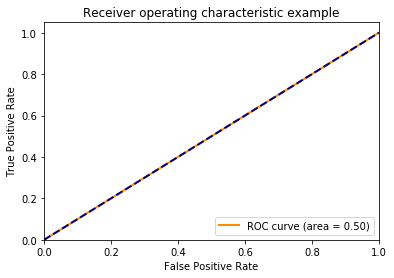

In [55]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


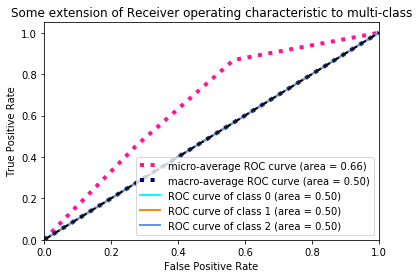

In [56]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()